In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA = pd.read_csv(r"C:/shoot/SHOOTS3.csv" , encoding = "CP949" , sep=",")
DATA

,assist,asx,asy,fin,hed,inv,nom,res,x,y
0,0,0.000000,0.000000,0,0,18,1,0,0.810456,0.401598
1,0,0.000000,0.000000,0,1,4,0,0,0.876681,0.497257
2,0,0.000000,0.000000,0,0,12,1,0,0.735775,0.395596
3,0,0.000000,0.000000,0,0,2,1,1,0.870968,0.551670
4,0,0.000000,0.000000,0,1,11,0,0,0.924941,0.417424
...,...,...,...,...,...,...,...,...,...,...
285464,0,0.000000,0.000000,0,0,13,1,0,0.875641,0.836167
285465,0,0.000000,0.000000,1,0,14,0,1,0.944847,0.510822
285466,1,0.859759,0.385634,0,0,22,1,1,0.904774,0.452464
285467,1,0.508597,0.217170,1,0,20,0,1,0.840309,0.558706


In [3]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
DATA.drop('res', axis=1) , DATA['res'] , random_state = 0 , shuffle=False,test_size = 0.2 )
print("X_train : " , X_train.shape)
print("y_train : " , y_train.shape)
print("X_test : " , X_test.shape)
print("y_test : " , y_test.shape)

X_train :  (228375, 9)
y_train :  (228375,)
X_test :  (57094, 9)
y_test :  (57094,)


In [4]:
model = RandomForestClassifier(n_estimators=200,max_features=5,max_depth=10)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=200)

In [5]:
from sklearn.metrics import f1_score
pred_forest = model.predict(X_test)
print(f1_score(y_test , pred_forest))

0.6047215672575903


In [6]:
#Sample predict prob
print(model.predict_proba([[1,0.95,0.5,0,0,6,1,0.967135,0.51876]])[0][1])
print(model.predict([[1,0.95,0.5,0,0,6,1,0.967135,0.51876]]))

0.9128795212323007
[1]


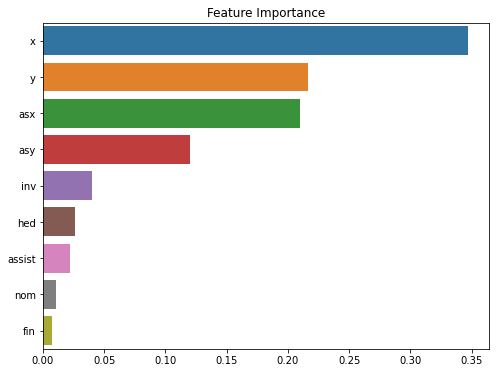

In [7]:
importances_values = model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature Importance')
sns.barplot(x = top, y = top.index)
plt.show()

[0.10052279 0.47693921 0.2531204  ... 0.66488465 0.5367155  0.29034316]
 ROC AUC=0.804


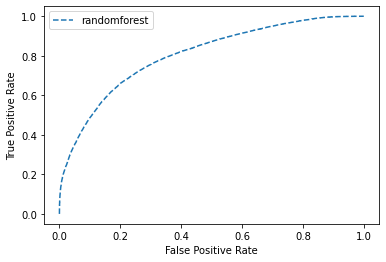

In [8]:
# Roc Curve
probs = model.predict_proba(X_test)
probs = probs[:, 1]
print(probs)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print(' ROC AUC=%.3f' % (auc))

rf_fpr, rf_tpr, _ = roc_curve(y_test, probs)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='randomforest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [9]:

from imblearn.over_sampling import SMOTE

#득점 상황에서의 케이스 추가

X_smo_t , y_smo_t = SMOTE(random_state = 0 ).fit_resample(X_train , y_train)
print(X_smo_t.shape)
print(y_smo_t.shape)

(303368, 9)
(303368,)


In [10]:
model2 = RandomForestClassifier(n_estimators=200,max_features=3,max_depth=20)
model2.fit(X_smo_t, y_smo_t)

RandomForestClassifier(max_depth=20, max_features=3, n_estimators=200)

In [11]:
pred_forest2 = model2.predict(X_test)
print(f1_score(y_test , pred_forest2))

0.6404077628083946


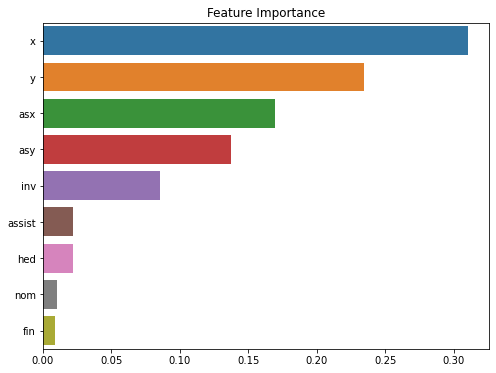

In [12]:
importances_values = model2.feature_importances_
importances = pd.Series(importances_values, index=X_smo_t.columns)
top = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature Importance')
sns.barplot(x = top, y = top.index)
plt.show()

In [13]:
print(model2.predict_proba([[1,0.95,0.5,0,0,6,1,0.967135,0.51876]])[0][1])
print(model2.predict([[1,0.95,0.5,0,0,6,1,0.967135,0.51876]]))

0.9563912098000062
[1]


In [19]:
pickle.dump( model, open( "pickle_XG.p", "wb" ) )